# Week4 - Homework

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/airbnb_nyc_2019.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Question 1:
### Which features can we use?

In [2]:
selected_features = df[['latitude', 'longitude', 'neighbourhood_group', 'price', 'room_type', 'minimum_nights','number_of_reviews', 'availability_365']]


These features were selected because they could have an effect on the target variable and are useful for the Airbnb rental market. It's important to try different features and make changes over and over again because features can work better or worse based on the dataset and the algorithm used. I have selected following features considering the domain specific.

In [3]:
from sklearn.model_selection import train_test_split
features = ['latitude', 'longitude', 'neighbourhood_group', 'room_type', 'minimum_nights', 'price', 'number_of_reviews', 'availability_365']


X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print(f'\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 39,116
Records in test data: 9,779

Features:
latitude
longitude
neighbourhood_group
room_type
minimum_nights
price
number_of_reviews
availability_365


## Question 2:
Split the features into two lists, one for the numerical features and another for the categorical features.

In [4]:
# Continous features
numerical_features = [ 'minimum_nights','availability_365','number_of_reviews','latitude','minimum_nights']

# Categorical features
categorical_features = ['neighbourhood_group', 'room_type']


In [5]:
print('continous_features:')
print(*numerical_features, sep='\n')

print('\nCategorical Features:')
print(*categorical_features, sep='\n')


continous_features:
minimum_nights
availability_365
number_of_reviews
latitude
minimum_nights

Categorical Features:
neighbourhood_group
room_type


## Question 3:
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Creating numerical transformer pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replaced missing values with median
    ('scaler', StandardScaler())  # Standardizing the numerical values
])

## Question 4:
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [7]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse=False))
])

## Question 5:

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [8]:
from sklearn.compose import ColumnTransformer

preprocessor= ColumnTransformer([
    ('continous features', numerical_transformer, numerical_features),
    ('catagorical features', categorical_transformer, categorical_features)
])

X_train_transformed = preprocessor.fit_transform(X_train)

/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Question 6:

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [9]:
 from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Add Linear Regression model to the pipeline
full_pipeline_with_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [10]:
# Fit the pipeline on the training data
full_pipeline_with_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = full_pipeline_with_model.predict(X_test)

# Calculating R-squared on the test data
r2 = r2_score(y_test, y_pred)

# Display R-squared
print(f'R-squared on the test data: {r2:.4f}')

R-squared on the test data: 0.0872


/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Question 7:

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

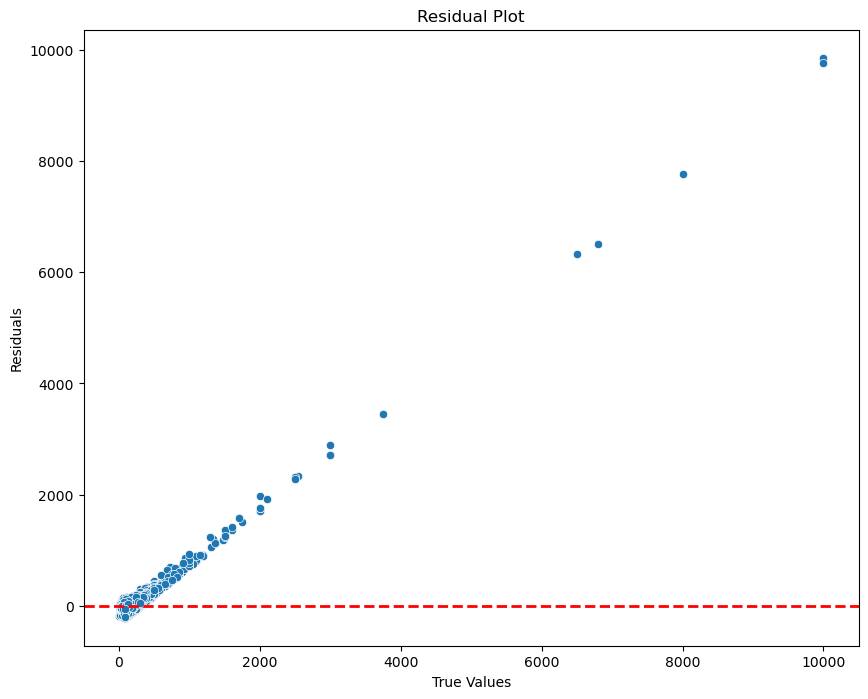

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating residuals
residuals = y_test - y_pred

# Plotting and Displaying residuals
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()


we can observe Unequal spread of residuals,model suggest that there are performance and potential areas for improvement.

## Question 8:

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [12]:
from sklearn.linear_model import Ridge

# Update the model in the pipeline to use Ridge Regression with alpha=100
full_pipeline_ridge = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model', Ridge(alpha=100))
])
full_pipeline_ridge.fit(X_train, y_train)

# Predicting on the test data
y_pred_ridge = full_pipeline_ridge.predict(X_test)

# Calculating R-squared on the test data with Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)

# Displaying R² with Ridge Regression
print(f'R-squared with Ridge Regression on the test data: {r2_ridge:.4f}')

R-squared with Ridge Regression on the test data: 0.0870


/Users/saiakhilsadula/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
